Created by: Arjun Pukale<br>
contact: arjunpukale@gmal.com<br>
date of creation: 08-03-2020

# Permission to save model to your google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Creating a folder in your drive to save Trained Model <br>
(**Skip if you have already done previously**)

In [0]:
!mkdir '/content/drive/My Drive/MalariaPredictor'

In [0]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1Stgb28a2CUiq6n4ukN9thrbaUI2MqRob',
                                    dest_path='/content/drive/My Drive/MalariaPredictor/model.h5',
                                    unzip=True)

Unzipping...

/usr/local/lib/python3.6/dist-packages/google_drive_downloader/google_drive_downloader.py:78: UserWarning: Ignoring `unzip` since "1Stgb28a2CUiq6n4ukN9thrbaUI2MqRob" does not look like a valid zip file
  warnings.warn('Ignoring `unzip` since "{}" does not look like a valid zip file'.format(file_id))


# Loading the Trained Model

In [0]:
from tensorflow.keras.models import load_model
loaded_model2 = load_model("/content/drive/My Drive/MalariaPredictor/model.h5")
print("Model Loaded!!!")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model Loaded!!!


# Using Model for Making Prediction

In [0]:
def predict(img_path):
  import numpy as np
  from PIL import Image
  import matplotlib.pyplot as plt
  %matplotlib inline
  img=Image.open(img_path)
  img=img.resize((100,100))
  img_array=np.array(img).astype('float32')/255
  result=np.ravel(loaded_model2.predict(np.expand_dims(img_array,axis=0)))
  p=1-result[0]
  txt='Probablity: '+str(round((1-result[0])*100,2))+'%'
  if p>=0.5:
    color='red'
  else:
    color='green'
  plt.figure(facecolor=color)
  plt.title(txt,color='white',fontsize=18)
  fig=plt.imshow(img)
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)

Sample

In [0]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1UQIQdtPoZEYpBcWo44eN4JJTcgzSHcaR',
                                    dest_path='/content/sample_img.png',
                                    unzip=True)

Unzipping...

/usr/local/lib/python3.6/dist-packages/google_drive_downloader/google_drive_downloader.py:78: UserWarning: Ignoring `unzip` since "1UQIQdtPoZEYpBcWo44eN4JJTcgzSHcaR" does not look like a valid zip file
  warnings.warn('Ignoring `unzip` since "{}" does not look like a valid zip file'.format(file_id))


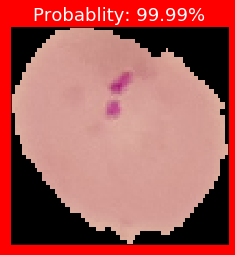

In [0]:
img_path='/content/sample_img.png'
predict(img_path)